In [1]:
import collections
import itertools
import json
import datetime
import math
import time

import ijson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

In [2]:
LANGUAGES = {
   "python" : 1,
"javascript" : 1,
    "java": 1,
    "ruby": 1, 
    "r": 1, 
    "c": 1,
}

COLORS = [
    'red',
    'peru',
    'purple',
    'palevioletred',
    'dodgerblue',
    'mediumseagreen',
]

>>python<<
>>javascript<<
>>java<<
>>ruby<<


/tmp/ipykernel_53615/1933346682.py:71: RuntimeWarning: invalid value encountered in divide
  range(5, SAMPLE_SIZE), (ys_pairs / ys_libs ** alpha)[5:],


>>r<<
>>c<<


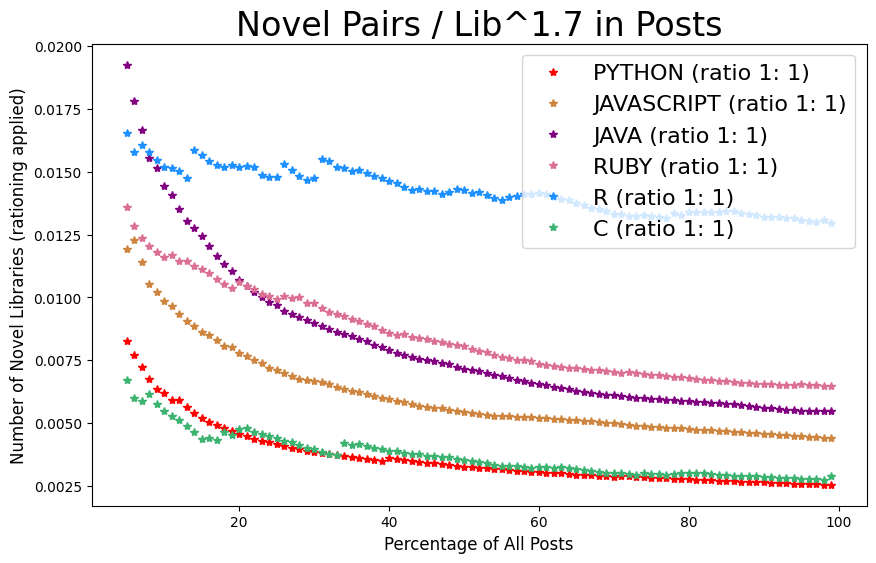

In [3]:


SAMPLE_SIZE = 100
ALPHA = 1.7

# plt.figure(figsize=(10,6))
# plt.title(f"Novel Libraries in Posts", fontsize=24)
# for index, (language, ratio) in enumerate(LANGUAGES.items()):
#     print(f">>{language}<<")
#     with open(f"data/results/{language}/{language}_post_to_libs.json") as handle:
#         post_to_libs = json.load(handle)
    
#     # Create samples of a given size
#     xs = range(SAMPLE_SIZE)
#     ys_libs = np.array([
#         d[1] / ratio for d in [
#             post_to_libs['distinct_libs_plot'][int(index)]
#             for index  in np.linspace(0, len(post_to_libs['distinct_libs_plot']) - 1, SAMPLE_SIZE)
#         ]          
#     ])
#     m, b  = np.polyfit(xs, ys_libs, 1)
#     plt.plot(xs, ys_libs, "*", color=COLORS[index], label=f"{language.upper()} (ratio 1:{ratio})")
#     plt.plot(xs, [m * x + b for x in xs], "--", color=COLORS[index])
# plt.xlabel("Percentage of All Posts", fontsize=12)
# plt.ylabel("Number of Novel Libraries (rationing applied)", fontsize=12)
# plt.legend(fontsize=16)


# plt.figure(figsize=(10, 6))
# plt.title(f"Novel Pairs in Posts", fontsize=24)
# for index, (language, ratio) in enumerate(LANGUAGES.items()):
#     print(f">>{language}<<")
#     with open(f"data/results/{language}/{language}_post_to_libs.json") as handle:
#         post_to_libs = json.load(handle)
    
#     # Create samples of a given size
#     ys_pairs = np.array([
#         d[1] / ratio for d in [
#             post_to_libs['distinct_pairs_plot'][int(index)]
#             for index  in np.linspace(0, len(post_to_libs['distinct_pairs_plot']) - 1, SAMPLE_SIZE)
#         ]          
#     ])
#     m, b  = np.polyfit(xs, ys_pairs, 1)
#     plt.plot(range(SAMPLE_SIZE), ys_pairs ,"*",color=COLORS[index], label=f"{language.upper()} (ratio 1: {ratio})")
#     plt.plot(xs, [m * x + b for x in xs], "--", color=COLORS[index])

# plt.xlabel("Percentage of All Posts", fontsize=12)
# plt.ylabel("Number of Novel Libraries (rationing applied)", fontsize=12)
# plt.legend(fontsize=16)

for alpha in [ALPHA]:#np.arange(1, 2.05, 0.05):
    plt.figure(figsize=(10, 6))
    plt.title(f"Novel Pairs / Lib^{alpha} in Posts", fontsize=24)
    for index, (language, ratio) in enumerate(LANGUAGES.items()):
        print(f">>{language}<<")
        with open(f"data/results/{language}/{language}_post_to_libs.json") as handle:
            post_to_libs = json.load(handle)

        # Create samples of a given size
        ys_libs = np.array([
            d[1] / ratio for d in [
                post_to_libs['distinct_libs_plot'][int(index)]
                for index  in np.linspace(0, len(post_to_libs['distinct_libs_plot']) - 1, SAMPLE_SIZE)
            ]          
        ])
        ys_pairs = np.array([
            d[1] / ratio for d in [
                post_to_libs['distinct_pairs_plot'][int(index)]
                for index  in np.linspace(0, len(post_to_libs['distinct_pairs_plot']) - 1, SAMPLE_SIZE)
            ]          
        ])
        plt.plot(
            range(5, SAMPLE_SIZE), (ys_pairs / ys_libs ** alpha)[5:],
            "*",color=COLORS[index], label=f"{language.upper()} (ratio 1: {ratio})")

    plt.xlabel("Percentage of All Posts", fontsize=12)
    plt.ylabel("Number of Novel Libraries (rationing applied)", fontsize=12)
    plt.legend(fontsize=16)
    #plt.ylim(0, 0.01)

# Value tracking

In [3]:
WINDOW_DAYS = 365
VALUE_THRESHOLD_IN_WINDOW = 12
SAMPLE_SIZE = 100

LANGUAGES = {
   "python" : 1,
"javascript" : 1,
   "java": 1,
   "ruby": 1, 
   "r": 1, 
   "c": 1,
}

def get_dates_count_in_window(start_date_str: str, dates: list):
    start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
    cnt = 0
    index = 0
    while (
        index < len(dates) and 
        datetime.datetime.strptime(dates[index], "%Y-%m-%d") < start_date + datetime.timedelta(days=WINDOW_DAYS)
    ):
        cnt += 1
        index += 1
    return cnt


def iter_items(parser):
    for prefix, event, value in parser:
        if event == 'string':
            yield prefix, value


def load_libs(language):
    loot = {}
    date, imports = None, []
    with open(f"data/results/{language}/{language}_{language}_post_stats.json") as infile:
        for prefix, event, value in tqdm.tqdm(ijson.parse(infile)):
            if prefix == "item.date":
                date = value
            elif prefix == "item.imports.item":
                imports.append(value)
            elif event == "end_map":
                loot[date] = imports
                date, imports = None, []
    return loot

>>python<<


83461004it [00:44, 1861404.82it/s]
100%|████████████████████████████| 4510314/4510314 [00:02<00:00, 2092727.42it/s]


>>javascript<<


4694568it [00:02, 1642318.97it/s]
100%|██████████████████████████████| 233877/233877 [00:00<00:00, 1220222.16it/s]


>>java<<


56008255it [00:33, 1651915.55it/s]
100%|████████████████████████████| 3114958/3114958 [00:01<00:00, 2353342.68it/s]


>>ruby<<


15810267it [00:07, 2072020.62it/s]
100%|██████████████████████████████| 873597/873597 [00:00<00:00, 2175573.53it/s]


>>r<<


18327873it [00:10, 1813655.06it/s]
100%|██████████████████████████████| 992248/992248 [00:00<00:00, 1898748.85it/s]


>>c<<


280090it [00:00, 1286571.52it/s]
100%|████████████████████████████████| 13825/13825 [00:00<00:00, 1058375.06it/s]


[]

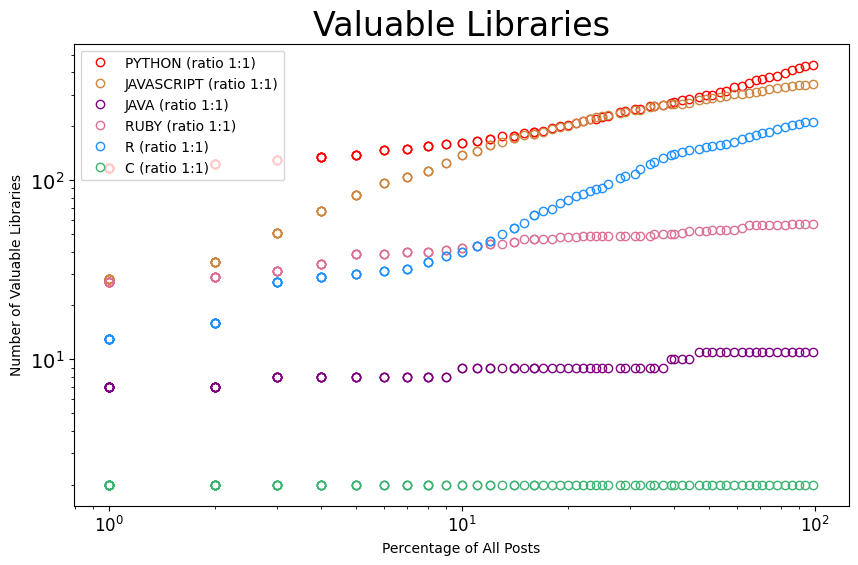

In [10]:
# CREATE VALUABLE LIBRARY CHARTS
plt.figure(figsize=(10,6))
for index, (language, ratio) in enumerate(LANGUAGES.items()):
    print(f">>{language}<<")
    
    with open(f"data/results/{language}/{language}_libs_first_dates.json") as handle:
        libs_first_dates = json.load(handle)
        
    with open(f"data/results/{language}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)

    valuable_libs = set([
        k for k, v in libs_first_dates.items() if
        get_dates_count_in_window(v['date'], all_libs_dates[k]) >= VALUE_THRESHOLD_IN_WINDOW
    ])

    val_xs, val_libs_ys = [], []
    value_libs_count = 0
    libs_have_seen = set()
    for date, libs in tqdm.tqdm(list(load_libs(language).items())):
        # Search for new individual libraries
        value_lib_found = False
        for lib in libs:
            if lib in libs_have_seen:
                continue
            libs_have_seen.add(lib)
            if lib in valuable_libs:
                value_lib_found = True
        if value_lib_found:
            value_libs_count += 1

        val_xs.append(date)
        val_libs_ys.append(value_libs_count)
    
    xs = [int(x) for x in np.geomspace(1, SAMPLE_SIZE-1, 100)]
    ys_libs = np.array([
        d / ratio for d in [
            val_libs_ys[int(index)]
            for index  in np.linspace(0, len(val_libs_ys) - 1, SAMPLE_SIZE)
        ]          
    ])

    plt.plot(xs, [ys_libs[i] for i in xs],"o", color=COLORS[index], markerfacecolor='none', label=f"{language.upper()} (ratio 1:{ratio})")

    plt.xticks(fontsize=12)
    plt.title(f"Valuable Libraries", fontsize=24)
    plt.xlabel("Percentage of All Posts", fontsize=10)
    plt.ylabel("Number of Valuable Libraries", fontsize=10)

    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", fontsize=10)
    
plt.loglog()

>>python<<


83461004it [00:45, 1833414.33it/s]
100%|████████████████████████████| 4510314/4510314 [00:03<00:00, 1262308.50it/s]


>>javascript<<


4694568it [00:03, 1492228.90it/s]
100%|███████████████████████████████| 233877/233877 [00:00<00:00, 570903.01it/s]


>>java<<


56008255it [00:34, 1634536.63it/s]
100%|████████████████████████████| 3114958/3114958 [00:01<00:00, 1874460.13it/s]


>>ruby<<


15810267it [00:08, 1947509.14it/s]
100%|██████████████████████████████| 873597/873597 [00:00<00:00, 1367329.02it/s]


>>r<<


18327873it [00:12, 1446284.18it/s]
100%|██████████████████████████████| 992248/992248 [00:00<00:00, 1364919.52it/s]


>>c<<


280090it [00:00, 1293148.36it/s]
100%|█████████████████████████████████| 13825/13825 [00:00<00:00, 731244.83it/s]


[]

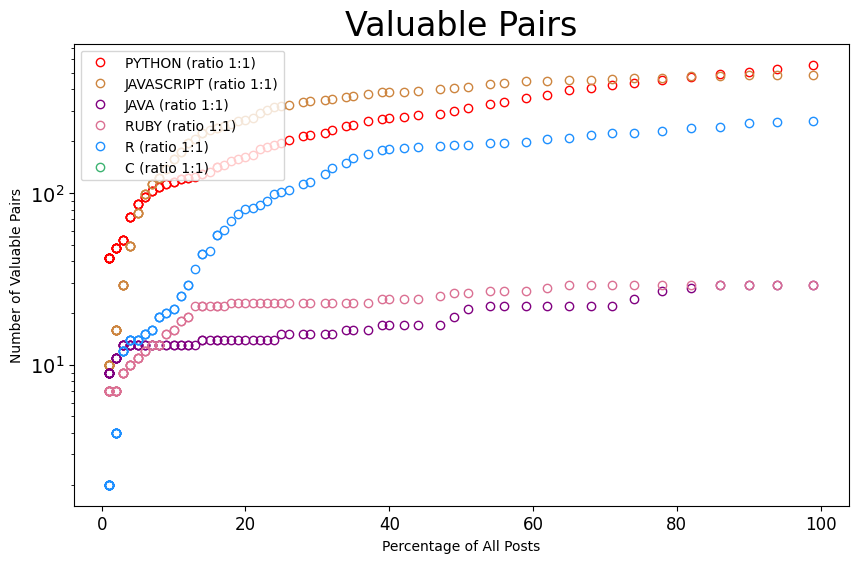

In [11]:
# CREATE VALUABLE PAIRS CHARTS
plt.figure(figsize=(10,6))
for index, (language, ratio) in enumerate(LANGUAGES.items()):
    print(f">>{language}<<")
    
    with open(f"data/results/{language}/{language}_pairs_first_dates.json") as handle:
        pairs_first_dates = json.load(handle)

    with open(f"data/results/{language}/{language}_all_pairs_dates.json") as handle:
        all_pairs_dates = json.load(handle)

    valuable_pairs = set([
        k for k, v in pairs_first_dates.items() if
        get_dates_count_in_window(v['date'], all_pairs_dates[k]) >= VALUE_THRESHOLD_IN_WINDOW
    ])

    val_xs, val_pairs_ys = [], []
    value_pairs_count = 0
    pairs_have_seen = set()
   
    for date, libs in tqdm.tqdm(list(load_libs(language).items())):
        #Search for new combinations
        value_pair_found = False
        for lib_a, lib_b in itertools.combinations(libs, 2):
            canonical_pair_name = "|".join(sorted([lib_a, lib_b]))
            if canonical_pair_name in pairs_have_seen:
                continue
            pairs_have_seen.add(canonical_pair_name)
            if canonical_pair_name in valuable_pairs:
                value_pair_found = True
        if value_pair_found:
            value_pairs_count += 1

        val_xs.append(date)
        val_pairs_ys.append(value_pairs_count)


    xs = [int(x) for x in np.geomspace(1, SAMPLE_SIZE - 1, 100)]
    ys_pairs = np.array([
        d / ratio for d in [
            val_pairs_ys[int(index)]
            for index  in np.linspace(0, len(val_pairs_ys) - 1, SAMPLE_SIZE)
        ]          
    ])

    plt.plot(xs, [ys_pairs[i] for i in xs],"o", color=COLORS[index], markerfacecolor='none', label=f"{language.upper()} (ratio 1:{ratio})")

    plt.xticks(fontsize=12)
    plt.title(f"Valuable Pairs", fontsize=24)
    plt.xlabel("Percentage of All Posts", fontsize=10)
    plt.ylabel("Number of Valuable Pairs", fontsize=10)

    plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.semilogy()

# Annual distribution

In [4]:
hit = load_libs('python')

83461004it [00:45, 1823185.72it/s]


In [8]:
# CREATE VALUABLE LIBRARY ANNUAL PROBABIILITY CHARS

xs = list(range(2008, 2024))
total_posts_per_year = {language: {year: 0 for year in xs} for language in LANGUAGES}
value_posts_per_year = {language: {year: 0 for year in xs} for language in LANGUAGES}
for index, (language, ratio) in enumerate(LANGUAGES.items()):
    print(f">>{language}<<")
    
    with open(f"data/results/{language}/{language}_libs_first_dates.json") as handle:
        libs_first_dates = json.load(handle)
        
    with open(f"data/results/{language}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)

    valuable_libs = set([
        k for k, v in libs_first_dates.items() if
        get_dates_count_in_window(v['date'], all_libs_dates[k]) >= VALUE_THRESHOLD_IN_WINDOW
    ])

    val_xs, val_libs_ys = [], []
    value_libs_count = 0
    libs_have_seen = set()
    for date, libs in tqdm.tqdm(list(load_libs(language).items())):
        total_posts_per_year[language][int(date[:4])] += 1
        # Search for new individual libraries
        value_lib_found = False
        for lib in libs:
            if lib in libs_have_seen:
                continue
            libs_have_seen.add(lib)
            if lib in valuable_libs:
                value_lib_found = True
        if value_lib_found:
            value_posts_per_year[language][int(date[:4])] += 1

>>python<<


83461004it [00:43, 1914547.23it/s]
100%|████████████████████████████| 4510314/4510314 [00:02<00:00, 1518502.94it/s]


>>javascript<<


4694568it [00:03, 1561291.55it/s]
100%|██████████████████████████████| 233877/233877 [00:00<00:00, 1077552.76it/s]


>>java<<


56008255it [00:34, 1642416.20it/s]
100%|████████████████████████████| 3114958/3114958 [00:01<00:00, 1714264.15it/s]


>>ruby<<


15810267it [00:08, 1901049.44it/s]
100%|██████████████████████████████| 873597/873597 [00:00<00:00, 1630634.99it/s]


>>r<<


18327873it [00:09, 1836308.47it/s]
100%|██████████████████████████████| 992248/992248 [00:00<00:00, 1477063.81it/s]


>>c<<


280090it [00:00, 1300703.74it/s]
100%|████████████████████████████████| 13825/13825 [00:00<00:00, 1013550.76it/s]


In [29]:
ratios = {language: {} for language in LANGUAGES}

for year in xs:
    for language in LANGUAGES:
        ratios[language][year] = round(
            value_posts_per_year[language][year] / max(1, total_posts_per_year[language][year]), 9) 
   

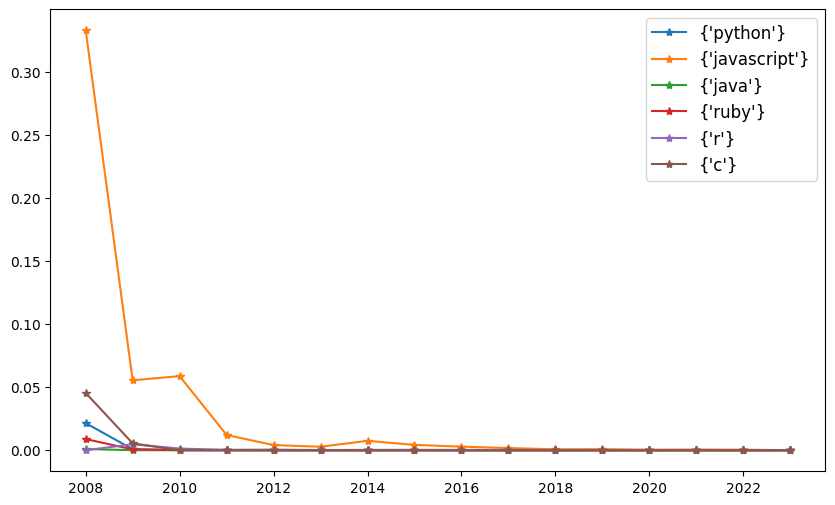

In [30]:
plt.figure(figsize=(10,6))
for language, dataset in ratios.items():
    plt.plot(dataset.keys(), dataset.values(), "*-", label={f"{language}"})
plt.legend(fontsize=12)